For project on AI-based management of food wastage in university hostels, we'll need to create synthetic data or transform the existing data to mimic the relevant aspects of food wastage in a university hostel setting.

# Step 1: Identify Relevant Features
Creating features that align with the objectives of project. Some possible features could be:

Number of plates served
Number of plates returned with food
Meal type (e.g., breakfast, lunch, dinner)
Day of the week
Special events (e.g., holidays, festivals)

# Step 2: Create a Synthetic Dataset
generating a synthetic dataset that includes the above features.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Define the parameters for the synthetic dataset
num_days = 365  # Number of days for which to generate data
meals = ['Breakfast', 'Lunch', 'Dinner']
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
special_events = ['None', 'Holiday', 'Festival']

In [3]:
# Generate random data
np.random.seed(42)
data = {
    'date': pd.date_range(start='2023-01-01', periods=num_days, freq='D'),
    'day_of_week': np.random.choice(days_of_week, num_days),
    'meal_type': np.random.choice(meals, num_days),
    'number_of_plates_served': np.random.randint(100, 500, num_days),
    'number_of_plates_returned_with_food': np.random.randint(0, 100, num_days),
    'special_event': np.random.choice(special_events, num_days, p=[0.9, 0.05, 0.05])
}

In [4]:
# Creating a DataFrame
synthetic_data = pd.DataFrame(data)

In [5]:
# Calculate the amount of food wasted
synthetic_data['food_wasted'] = synthetic_data['number_of_plates_returned_with_food'] * np.random.uniform(0.1, 0.5, num_days)

In [6]:
# Display the first few rows of the synthetic dataset
print(synthetic_data.head())

        date day_of_week  meal_type  number_of_plates_served  \
0 2023-01-01      Sunday  Breakfast                      247   
1 2023-01-02    Thursday  Breakfast                      416   
2 2023-01-03      Friday  Breakfast                      482   
3 2023-01-04      Sunday  Breakfast                      460   
4 2023-01-05   Wednesday      Lunch                      100   

   number_of_plates_returned_with_food special_event  food_wasted  
0                                   50          None    24.733252  
1                                   44          None     6.907922  
2                                   43          None    12.880876  
3                                    4          None     1.389049  
4                                   69          None    26.288033  


In [7]:
# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('synthetic_food_wastage_data.csv', index=False)

Step 3: Data Cleaning and Preparation
Prepare the synthetic dataset for training a machine learning model by cleaning and transforming the data as necessary.

Load and Prepare Data

In [8]:
# Load the synthetic dataset
data = pd.read_csv('C:/Users/Prokshitha/Downloads/AI_project/synthetic_food_wastage_data.csv')

In [9]:
# Convert date to datetime format
data['date'] = pd.to_datetime(data['date'])

In [10]:
# Checking for missing values
print(data.isnull().sum())

date                                     0
day_of_week                              0
meal_type                                0
number_of_plates_served                  0
number_of_plates_returned_with_food      0
special_event                          326
food_wasted                              0
dtype: int64


In [11]:
# Handle missing values if any
data.fillna(method='ffill', inplace=True)

C:\Users\Prokshitha\AppData\Local\Temp\ipykernel_1336\3873954351.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [12]:
# Summary statistics
print(data.describe())

                      date  number_of_plates_served  \
count                  365               365.000000   
mean   2023-07-02 00:00:00               295.076712   
min    2023-01-01 00:00:00               100.000000   
25%    2023-04-02 00:00:00               193.000000   
50%    2023-07-02 00:00:00               301.000000   
75%    2023-10-01 00:00:00               400.000000   
max    2023-12-31 00:00:00               499.000000   
std                    NaN               117.952471   

       number_of_plates_returned_with_food  food_wasted  
count                           365.000000   365.000000  
mean                             46.975342    14.080011  
min                               0.000000     0.000000  
25%                              23.000000     5.356410  
50%                              46.000000    12.138106  
75%                              71.000000    21.583784  
max                              99.000000    46.989585  
std                              28.8167

In [13]:
# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['meal_type', 'day_of_week', 'special_event'])

In [14]:
# Display the cleaned dataset
print(data.head())

        date  number_of_plates_served  number_of_plates_returned_with_food  \
0 2023-01-01                      247                                   50   
1 2023-01-02                      416                                   44   
2 2023-01-03                      482                                   43   
3 2023-01-04                      460                                    4   
4 2023-01-05                      100                                   69   

   food_wasted  meal_type_Breakfast  meal_type_Dinner  meal_type_Lunch  \
0    24.733252                 True             False            False   
1     6.907922                 True             False            False   
2    12.880876                 True             False            False   
3     1.389049                 True             False            False   
4    26.288033                False             False             True   

   day_of_week_Friday  day_of_week_Monday  day_of_week_Saturday  \
0               Fal

Plotting
Next, we can create various plots to visualize different aspects of the data.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

Distribution of Food Wastage:

Used sns.histplot with KDE (Kernel Density Estimation) for better understanding of distribution.
Added title, and axis labels with increased font size for clarity.

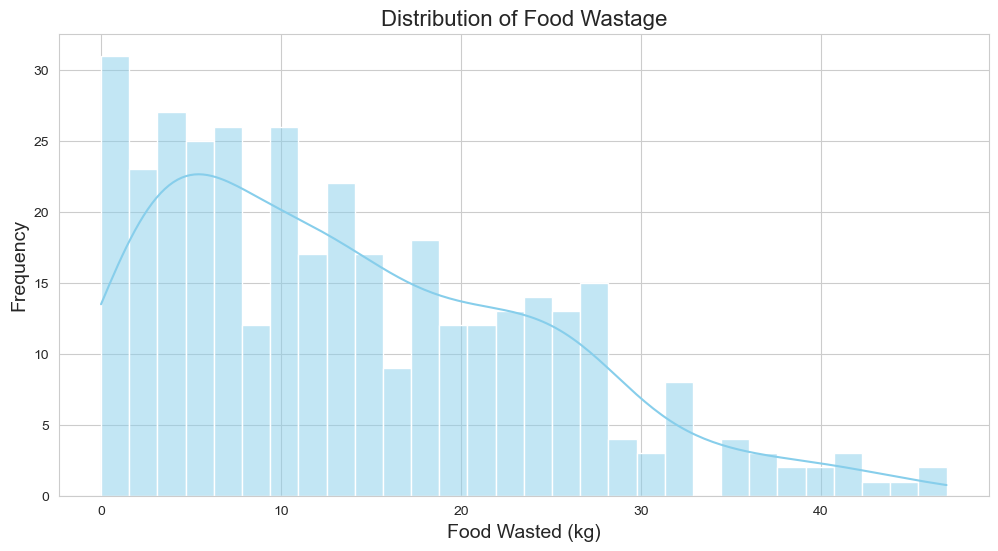

In [19]:
# Distribution of Food Wastage
plt.figure(figsize=(12, 6))
sns.histplot(data['food_wasted'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Food Wastage', fontsize=16)
plt.xlabel('Food Wasted (kg)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

Number of Plates Returned with Food vs. Food Wastage:

Used sns.scatterplot for visualizing returned plates versus food wastage.
Selected contrasting color for better visualization.

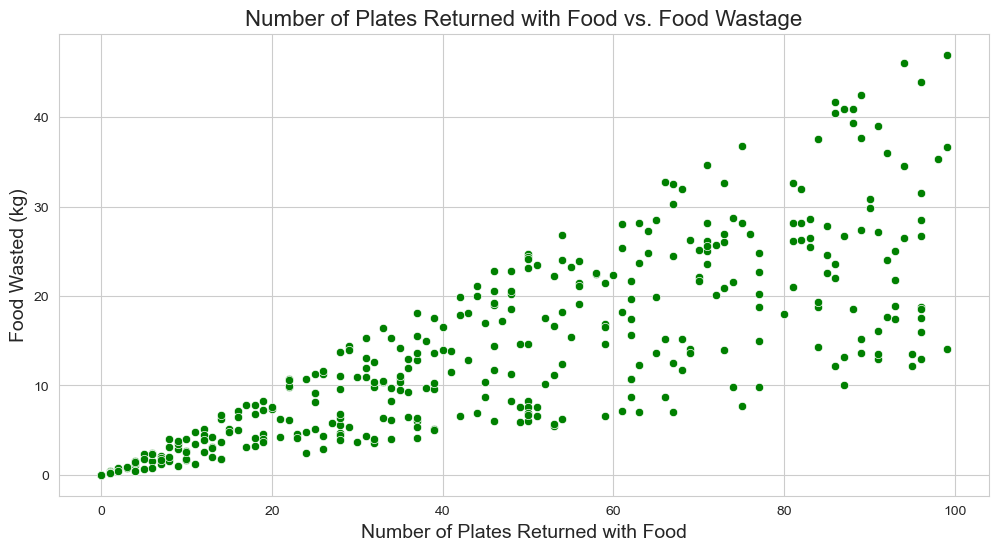

In [20]:
# Number of Plates Returned with Food vs. Food Wastage
plt.figure(figsize=(12, 6))
sns.scatterplot(x='number_of_plates_returned_with_food', y='food_wasted', data=data, color='green')
plt.title('Number of Plates Returned with Food vs. Food Wastage', fontsize=16)
plt.xlabel('Number of Plates Returned with Food', fontsize=14)
plt.ylabel('Food Wasted (kg)', fontsize=14)
plt.show()

Time Series Plot of Food Wastage:

Added a time series plot to show trends over time.
Used markers for better data point visibility.

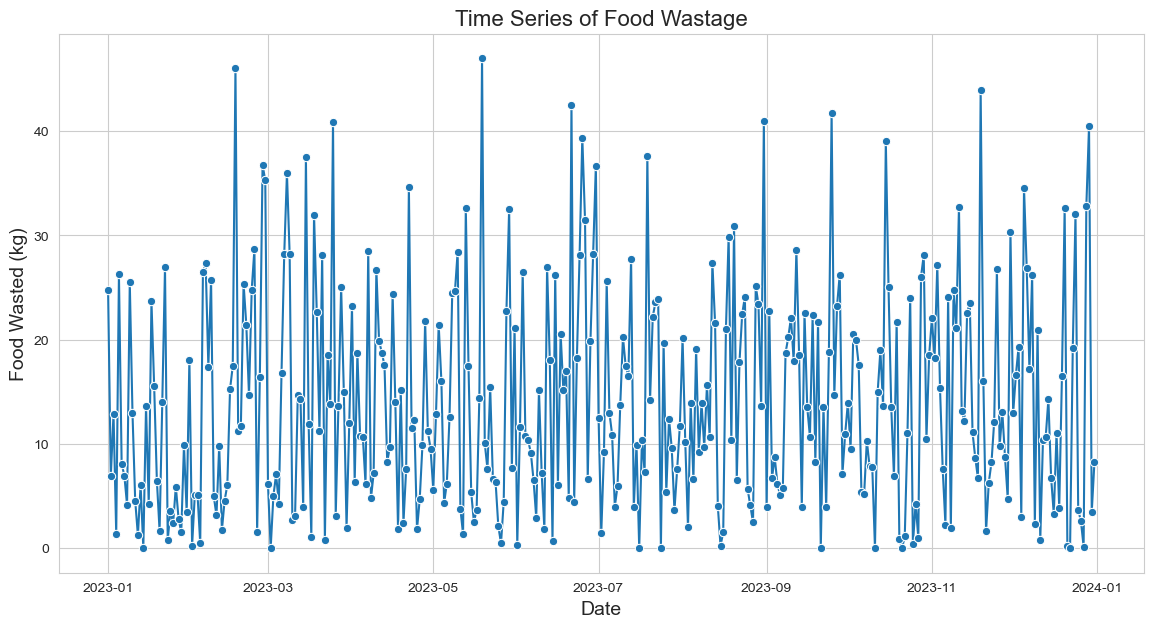

In [21]:
# Additional EDA: Time series plot of food wastage
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='food_wasted', data=data, marker='o')
plt.title('Time Series of Food Wastage', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Food Wasted (kg)', fontsize=14)
plt.show()

Step 4: Model Training

In this synthetic dataset, 'food_wasted' is a continuous numerical value representing the amount of food wasted, making it a regression problem. Hence, here we perform regression analysys using the synthetic dataset.

Load and Inspect the Data

In [ ]:
# Load the synthetic dataset from a CSV file 
file_path = 'C:/Users/Prokshitha/Downloads/AI_project/synthetic_food_wastage_data.csv'
data = pd.read_csv(file_path)

In [24]:
# Display the first few rows of the dataset to understand its structure
print(data.head())
print(data.info())

         date day_of_week  meal_type  number_of_plates_served  \
0  2023-01-01      Sunday  Breakfast                      247   
1  2023-01-02    Thursday  Breakfast                      416   
2  2023-01-03      Friday  Breakfast                      482   
3  2023-01-04      Sunday  Breakfast                      460   
4  2023-01-05   Wednesday      Lunch                      100   

   number_of_plates_returned_with_food special_event  food_wasted  
0                                   50           NaN    24.733252  
1                                   44           NaN     6.907922  
2                                   43           NaN    12.880876  
3                                    4           NaN     1.389049  
4                                   69           NaN    26.288033  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                    

Apply One-Hot Encoding with Error Handling

After successfully applying one-hot encoding, we can proceed with the model training and prediction.

In [25]:
# Ensure all columns are treated correctly for one-hot encoding
categorical_columns = ['meal_type', 'day_of_week', 'special_event']

# Check if all categorical columns are present in the dataframe
for col in categorical_columns:
    if col not in data.columns:
        print(f"Column '{col}' is missing in the dataset.")

# Apply one-hot encoding
try:
    data = pd.get_dummies(data, columns=categorical_columns)
    print("One-hot encoding applied successfully.")
except Exception as e:
    print(f"An error occurred during one-hot encoding: {e}")

# Display the first few rows of the transformed dataset
print(data.head())


One-hot encoding applied successfully.
         date  number_of_plates_served  number_of_plates_returned_with_food  \
0  2023-01-01                      247                                   50   
1  2023-01-02                      416                                   44   
2  2023-01-03                      482                                   43   
3  2023-01-04                      460                                    4   
4  2023-01-05                      100                                   69   

   food_wasted  meal_type_Breakfast  meal_type_Dinner  meal_type_Lunch  \
0    24.733252                 True             False            False   
1     6.907922                 True             False            False   
2    12.880876                 True             False            False   
3     1.389049                 True             False            False   
4    26.288033                False             False             True   

   day_of_week_Friday  day_of_week_Monday

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [36]:
# Select features and target variable
X = data.drop(columns=['date', 'food_wasted'])
y = data['food_wasted']

Data Preparation
Preparing the data by splitting it into training and testing sets, and by performing any necessary preprocessing steps such as scaling the features.

i. The synthetic dataset is loaded and cleaned (handling missing values and converting categorical variables using one-hot encoding).
ii. Features ('X') and target variable ('y') are selected.
iii. Data is split into training and testing sets.

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training
We'll use a regression model to predict the amount of food wasted. For this example, we'll use a Random Forest Regressor, but other regression models like Linear Regression, Support Vector Regressor (SVR), or Gradient Boosting Regressor can also be considered.

i. A RandomForestRegressor model is trained on the training data.
ii. The model is used to predict food wastage on the test set.

In [39]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Model Evaluation
We will evaluate the model's performance using metrics such as Mean Squared Error (MSE)

In [40]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 39.53217109571819


Prediction Function:
A function 'predict_food_wastage' is defined to make predictions for new input data.

Input Parameters: The prediction is based on the specific input features you provided to the model:

number_of_plates_served: 300
number_of_plates_returned_with_food: 50
meal_type: 'Lunch'
day_of_week: 'Monday'
special_event: 'None'

In [41]:
# Function to predict food wastage
def predict_food_wastage(number_of_plates_served, number_of_plates_returned_with_food, meal_type, day_of_week, special_event):
    input_data = pd.DataFrame({
        'number_of_plates_served': [number_of_plates_served],
        'number_of_plates_returned_with_food': [number_of_plates_returned_with_food],
        'meal_type': [meal_type],
        'day_of_week': [day_of_week],
        'special_event': [special_event]
    })
    input_data = pd.get_dummies(input_data).reindex(columns=X.columns, fill_value=0)
    input_data = scaler.transform(input_data)
    prediction = model.predict(input_data)
    return prediction[0]

In [42]:
# Example usage
example_prediction = predict_food_wastage(300, 50, 'Lunch', 'Monday', 'None')
print(f'Predicted Food Wastage: {example_prediction}')

Predicted Food Wastage: 8.702813197757733


Interpretation of the Predicted Value

The final predicted value, 8.702813197757733, represents the amount of food wastage predicted by the model for the given input parameters. 

Since the target variable (food_wasted) is a continuous numerical value representing the amount of food wasted, this predicted value is interpreted as follows:

Interpretation of the Predicted Value
Value: 8.702813197757733
Unit: The unit is determined by how you measured food wastage in your dataset. It could be in kilograms, grams, or any other unit of weight.

Contextualizing the Prediction
Food Wastage Amount: The predicted value indicates that, given the input parameters (number of plates served, number of plates returned with food, meal type, day of the week, and special event), approximately 8.7 units of food (e.g., kilograms) are expected to be wasted.